### Install required packages:

In [2]:
!pip install pandas
!pip install seaborn


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: pip install --upgrade pip


### Import required libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math


### Load dataset

In [4]:
bike_dataset = pd.read_csv('hour.csv')
print(bike_dataset)


       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1              

### Define the attributes to include in the Histograms

In [8]:
columns_to_plot = {
    'season': 'Season',
    'yr': 'Year',
    'mnth': 'Month',
    'hr': 'Hour',
    'holiday': 'Holiday',
    'weekday': 'Weekday',
    'workingday': 'Working Day',
    'weathersit': 'Weather Situation',
    'temp': 'Temperature (normalized)',
    'atemp': 'Feeling Temperature (normalized)',
    'hum': 'Humidity (normalized)',
    'windspeed': 'Windspeed (normalized)',
    'casual': 'Casual Users',
    'registered': 'Registered Users',
    'cnt': 'Total Count of Bike Rentals'
}


### Generate Histograms

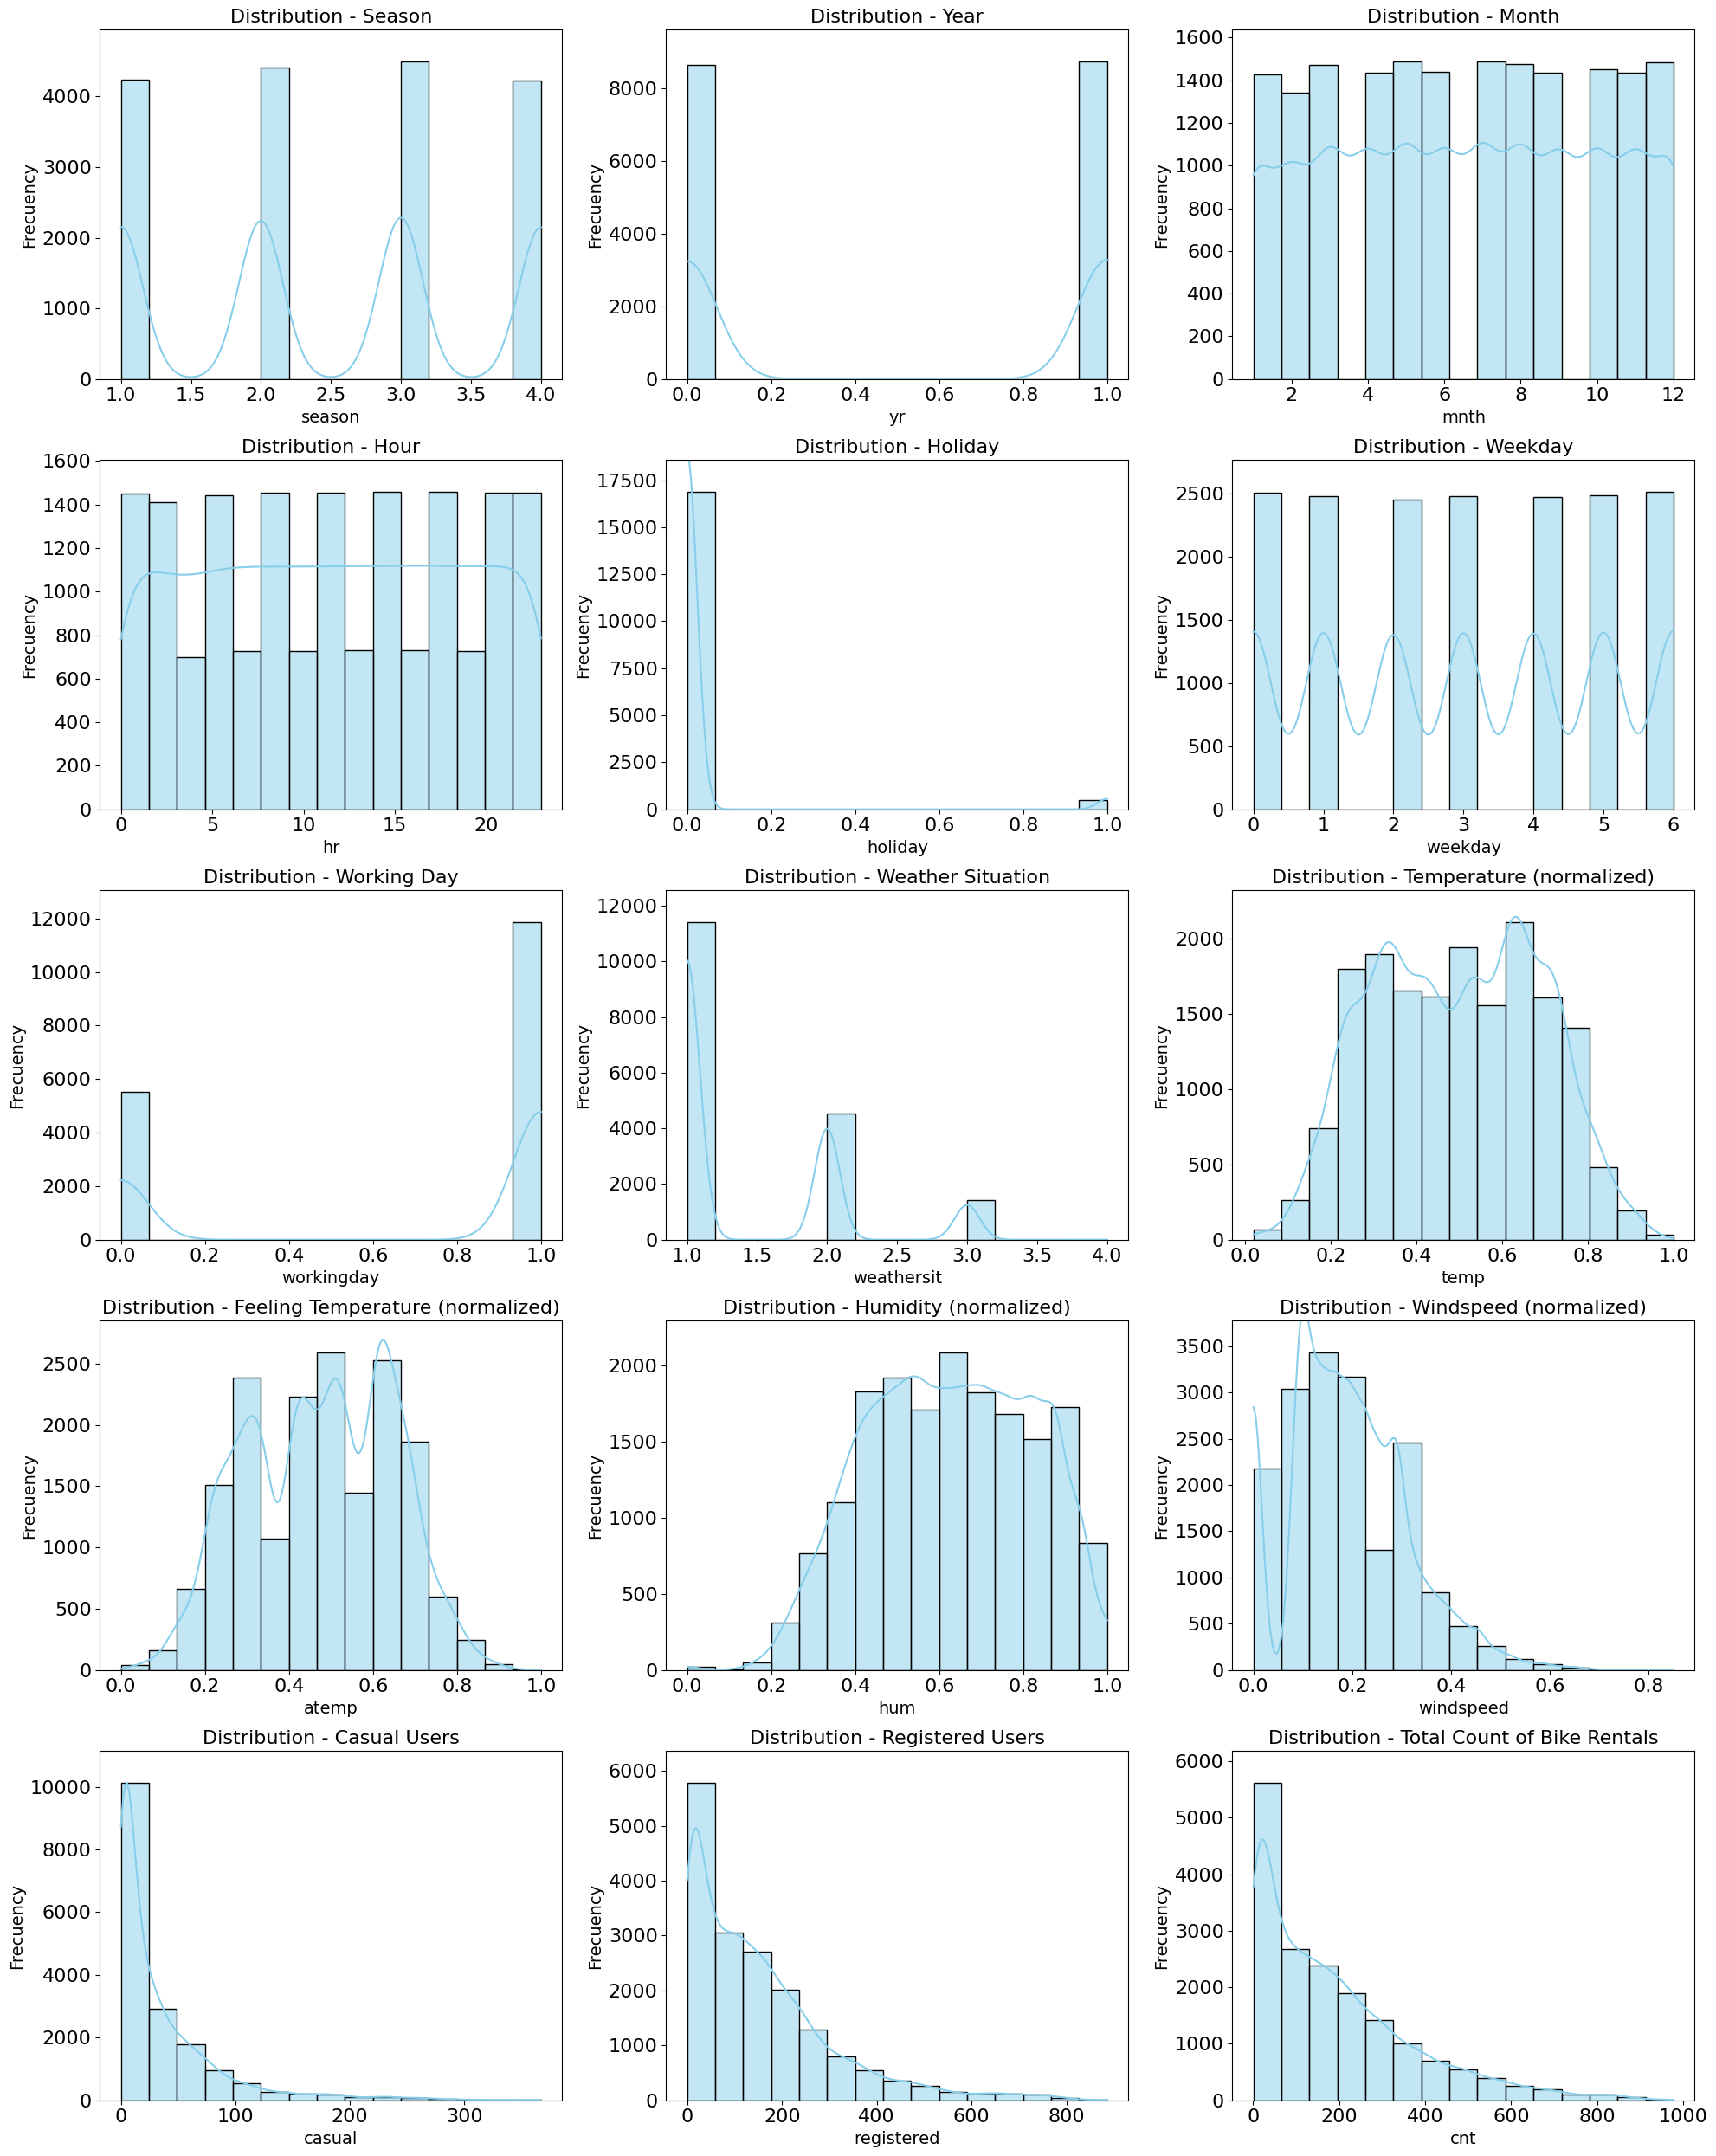

In [9]:
charts_per_row = 3
total_columns = len(columns_to_plot)
rows = math.ceil(total_columns / charts_per_row)

fig, axs = plt.subplots(rows, charts_per_row, figsize=(20, rows * 5))

axs = axs.ravel()

for i, column in enumerate(columns_to_plot):
    if pd.api.types.is_numeric_dtype(bike_dataset[column]):
        sns.histplot(bike_dataset[column], kde=True, ax=axs[i], color='skyblue', edgecolor='black', bins=15)
        max_count = max(np.histogram(bike_dataset[column].dropna(), bins=15)[0])
        axs[i].set_ylim(top=max_count * 1.1) 
    else:
        sns.countplot(data=obesity_dataset, x=column, ax=axs[i], color='skyblue', edgecolor='black')
        axs[i].tick_params(axis='x', rotation=20)
    
    axs[i].tick_params(axis='y', labelsize=16)
    axs[i].tick_params(axis='x', labelsize=16)
    axs[i].set_title(f'Distribution - {columns_to_plot[column]}', fontsize=16)
    axs[i].set_xlabel(column, fontsize=14)
    axs[i].set_ylabel('Frecuency', fontsize=14)

plt.tight_layout()
plt.show()
